In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
Housedataset = pd.read_csv('/content/drive/MyDrive/housepriceprediction/data.csv', index_col= 'date', parse_dates= ['date'])

In [4]:
Housedataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
Housedataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
Housedataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4600 entries, 2014-05-02 to 2014-07-10
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)

In [7]:
Housedataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
y= Housedataset['price']

In [9]:
y

date
2014-05-02    3.130000e+05
2014-05-02    2.384000e+06
2014-05-02    3.420000e+05
2014-05-02    4.200000e+05
2014-05-02    5.500000e+05
                  ...     
2014-07-09    3.081667e+05
2014-07-09    5.343333e+05
2014-07-09    4.169042e+05
2014-07-10    2.034000e+05
2014-07-10    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [10]:
X = Housedataset.drop(['price', 'country', 'street', 'city'	,'statezip'], axis= 1)

In [11]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
date,,,,,,,,,,,,
2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-09,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
2014-07-09,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
2014-07-09,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [13]:
xgbregressor = xgb.XGBRegressor(max_depth=6, n_estimators=300)

In [14]:
xgbregressor.fit(X_train, y_train)

[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, n_estimators=300)

In [15]:
xgbregressor_train_pred = xgbregressor.predict(X_train)

In [16]:
xgbregressor_test_pred = xgbregressor.predict(X_test)

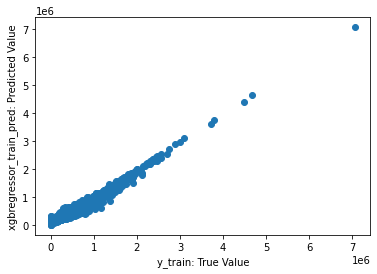

In [17]:
plt.scatter(y_train, xgbregressor_train_pred)
plt.xlabel("y_train: True Value")
plt.ylabel("xgbregressor_train_pred: Predicted Value")
plt.show()

In [18]:
r2_score(y_train, xgbregressor_train_pred)

0.9494928076089406